In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

import tqdm
from statsmodels.graphics.tsaplots import plot_acf

import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [10]:
df = pd.read_csv('/Users/markdetiberiis/Desktop/Incarceration_Data/cleaned_prison_data.csv')

In [11]:
df

,Unnamed: 0,yfips,year,fips,state,county_name,total_pop,total_pop_15to64,female_pop_15to64,male_pop_15to64,...,native_prison_pop_rate,white_prison_pop_rate,total_prison_adm_rate,female_prison_adm_rate,male_prison_adm_rate,aapi_prison_adm_rate,black_prison_adm_rate,latinx_prison_adm_rate,native_prison_adm_rate,white_prison_adm_rate
0,0,197001001,1970,1001,AL,Autauga County,24661,14154,7293,6861,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00
1,1,197101001,1971,1001,AL,Autauga County,25503,14765,7585,7180,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00
2,2,197201001,1972,1001,AL,Autauga County,27156,15939,8168,7771,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00
3,3,197301001,1973,1001,AL,Autauga County,28453,16906,8651,8255,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00
4,4,197401001,1974,1001,AL,Autauga County,29261,17578,8992,8586,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153806,153806,201456045,2014,56045,WY,Weston County,7138,4606,2064,2542,...,0.0,0.00,86.84,0.0,0.00,0.0,0.0,0.0,0.0,0.00
153807,153807,201556045,2015,56045,WY,Weston County,7197,4614,2070,2544,...,0.0,0.00,108.37,0.0,196.54,0.0,0.0,0.0,0.0,94.47
153808,153808,201656045,2016,56045,WY,Weston County,7213,4582,2086,2496,...,0.0,310.04,87.30,0.0,160.26,0.0,0.0,0.0,0.0,95.40
153809,153809,201756045,2017,56045,WY,Weston County,6986,4402,1985,2417,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00


In [12]:
df.drop(['state','county_name'],axis = 1,inplace=True)

In [ ]:
#perform Dickey Fuller tests for whole country dataset

In [13]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(df['total_jail_pop'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                    -34.029546
p-value                             0.000000
#Lags Used                         76.000000
Number of Observations Used    153732.000000
dtype: float64


In [14]:
# create a differenced series
def difference(dataset, interval=1):
    diff = []
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [15]:
total_jail_pop_df = df[[ 'total_jail_pop']].copy()

<Figure size 1224x576 with 0 Axes>

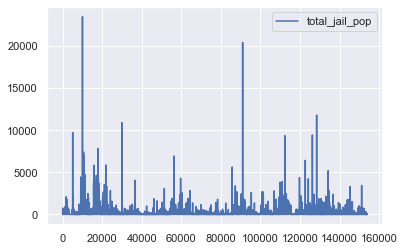

In [16]:
plt.figure(figsize=(17,8))
total_jail_pop_df.plot.line()

In [17]:
diff_jail_pop = total_jail_pop_df.diff().rename(index=str, columns={"total_jail_pop": "total jail pop"})

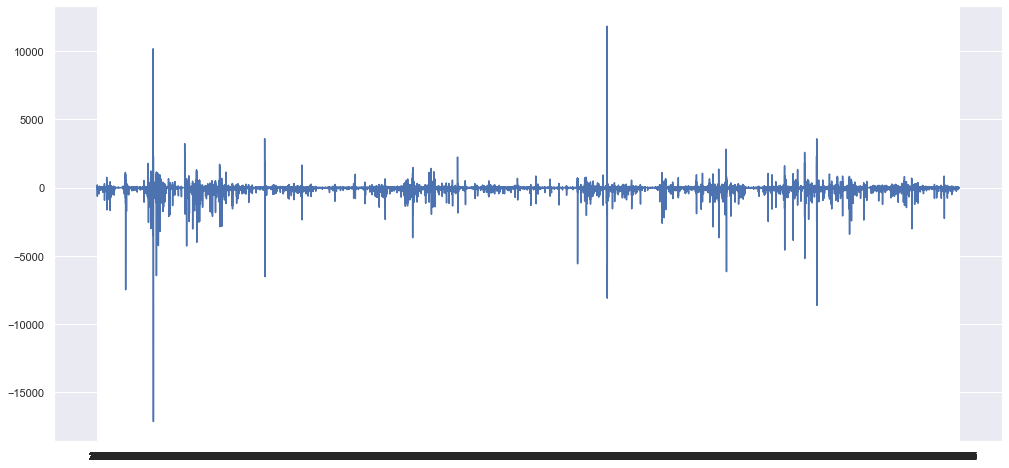

In [18]:
#plot of differenced data (more stationary)
plt.figure(figsize=(17,8))
plt.plot(diff_jail_pop)

In [19]:
total_jail_lag_1 = total_jail_pop_df.shift(periods=1)
total_jail_lag_2 = total_jail_pop_df.shift(periods=2)

No handles with labels found to put in legend.


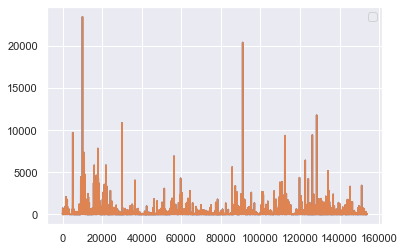

In [20]:
plt.plot(total_jail_pop_df)
plt.plot(total_jail_lag_1)
plt.legend()

No handles with labels found to put in legend.


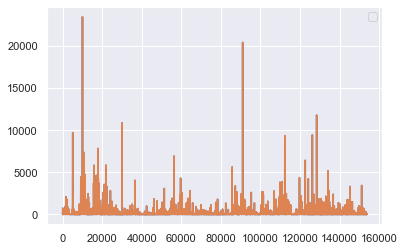

In [21]:
plt.plot(total_jail_pop_df)
plt.plot(total_jail_lag_2)
plt.legend()

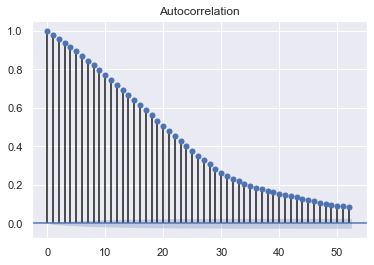

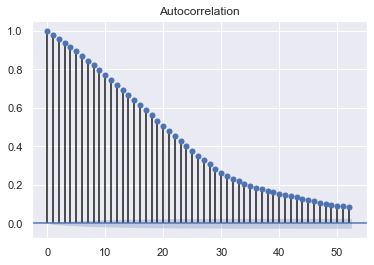

In [22]:
#auto corr for whole country dataset 

#plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(total_jail_pop_df[:-1], alpha=.05)

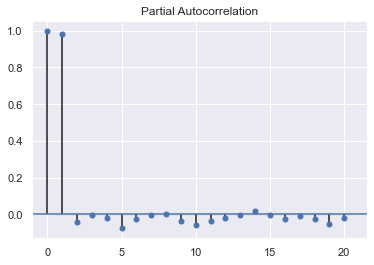

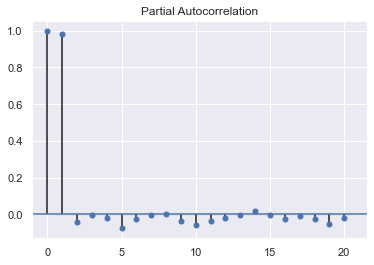

In [23]:
plot_pacf(total_jail_pop_df[:-1], alpha=.05, lags=20)

In [24]:
#total_jail_pop_df.Train=close_df[1:1150,] 
#total_jail_pop_df.Test=close_df[1151:1437,] 

In [25]:
model = ARIMA(total_jail_pop_df[:-1], order=(3,1,0))
jail_pop_model_fit = model.fit(disp=0)
print(jail_pop_model_fit.summary())

/Users/markdetiberiis/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:       D.total_jail_pop   No. Observations:               153809
Model:                 ARIMA(3, 1, 0)   Log Likelihood             -953547.727
Method:                       css-mle   S.D. of innovations            119.178
Date:                Mon, 02 Nov 2020   AIC                        1907105.453
Time:                        14:46:12   BIC                        1907155.171
Sample:                             1   HQIC                       1907120.255
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.251e-05      0.312      0.000      1.000      -0.612       0.613
ar.L1.D.total_jail_pop     0.0292      0.003     11.471      0.000       0.024       0.034
ar.L

In [26]:
# model = ARIMA(total_jail_pop_df[:-1], order=(2,2,3))
# jail_pop_model_fit = model.fit(disp=0)
# print(jail_pop_model_fit.summary())

In [27]:
# model = ARIMA(total_jail_pop_df[:-1], order=(4,2,3))
# jail_pop_model_fit = model.fit(disp=0)
# print(jail_pop_model_fit.summary())

<Figure size 1224x576 with 0 Axes>

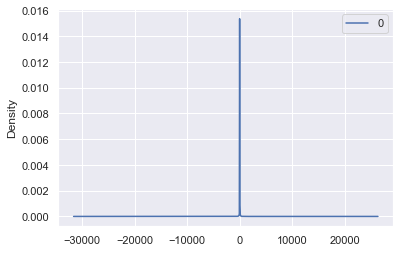

In [28]:
plt.figure(figsize=(17,8))
residuals = pd.DataFrame(jail_pop_model_fit.resid)
residuals.plot(kind='kde')
plt.show()

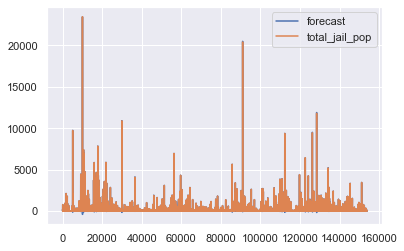

<Figure size 1224x576 with 0 Axes>

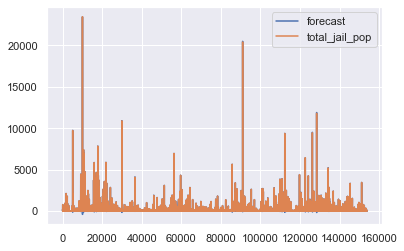

In [29]:
plt.figure(figsize=(17,8))
jail_pop_model_fit.plot_predict()

<Figure size 1224x576 with 0 Axes>

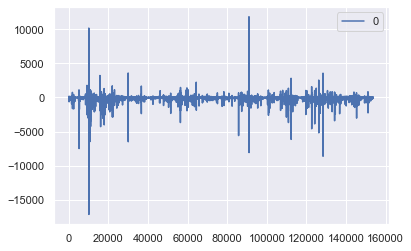

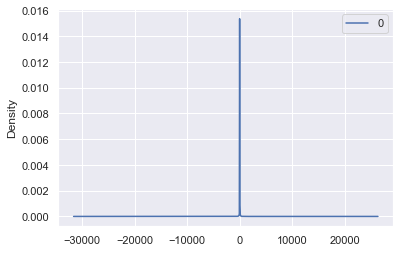

                  0
count  1.538090e+05
mean  -7.231495e-12
std    1.191785e+02
min   -1.712375e+04
25%   -1.656717e-01
50%    3.313389e-01
75%    3.095395e+00
max    1.182489e+04


In [30]:
# plot open residual errors

plt.figure(figsize=(17,8))
residuals = pd.DataFrame(jail_pop_model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [31]:
preds = jail_pop_model_fit.predict()

In [33]:
jail_pop_model_fit.forecast()

(array([5.00003161]),
 array([119.17808405]),
 array([[-228.58472088,  238.5847841 ]]))

In [92]:
CO_df = pd.read_csv('/Users/markdetiberiis/Desktop/Incarceration_Data/CO_data.csv')
MA_df = pd.read_csv('/Users/markdetiberiis/Desktop/Incarceration_Data/MA_data.csv')
LA_df = pd.read_csv('/Users/markdetiberiis/Desktop/Incarceration_Data/LA_data.csv')
MS_df = pd.read_csv('/Users/markdetiberiis/Desktop/Incarceration_Data/MS_data.csv')

In [93]:
CO_df.drop(['state','county_name'],axis = 1,inplace=True)
MA_df.drop(['state','county_name'],axis = 1,inplace=True)
LA_df.drop(['state','county_name'],axis = 1,inplace=True)
MS_df.drop(['state','county_name'],axis = 1,inplace=True)

In [38]:
#Perform Dickey Fuller for each state

from statsmodels.tsa.stattools import adfuller
test = adfuller(CO_df['total_jail_pop'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                -8.136404e+00
p-value                        1.056340e-12
#Lags Used                     2.800000e+01
Number of Observations Used    3.105000e+03
dtype: float64


In [94]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(MA_df['total_jail_pop'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                  -5.093040
p-value                          0.000014
#Lags Used                      10.000000
Number of Observations Used    673.000000
dtype: float64


In [40]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(LA_df['total_jail_pop'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                -6.961079e+00
p-value                        9.161250e-10
#Lags Used                     2.600000e+01
Number of Observations Used    3.107000e+03
dtype: float64


In [41]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(MS_df['total_jail_pop'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                -7.097257e+00
p-value                        4.257515e-10
#Lags Used                     2.700000e+01
Number of Observations Used    3.988000e+03
dtype: float64


<Figure size 1224x576 with 0 Axes>

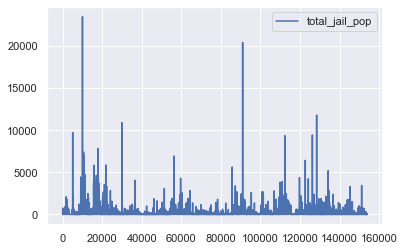

In [42]:
CO_total_jail_pop_df = CO_df[[ 'total_jail_pop']].copy()

plt.figure(figsize=(17,8))
total_jail_pop_df.plot.line()

<Figure size 1224x576 with 0 Axes>

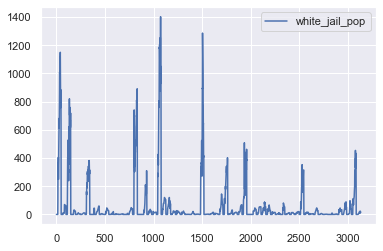

<Figure size 1224x576 with 0 Axes>

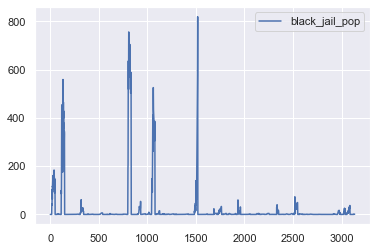

In [86]:
CO_total_black_jail_pop_df = CO_df[[ 'white_jail_pop']].copy()

plt.figure(figsize=(17,8))
CO_total_black_jail_pop_df.plot.line()

CO_total_white_jail_pop_df = CO_df[[ 'black_jail_pop']].copy()

plt.figure(figsize=(17,8))
CO_total_white_jail_pop_df.plot.line()

<Figure size 1224x576 with 0 Axes>

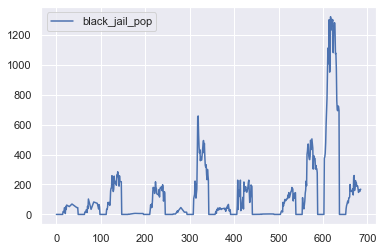

<Figure size 1224x576 with 0 Axes>

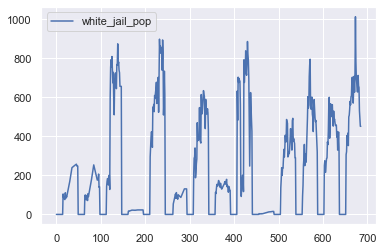

In [95]:
MA_total_black_jail_pop_df = MA_df[['black_jail_pop']].copy()

plt.figure(figsize=(17,8))
MA_total_black_jail_pop_df.plot.line()

MA_total_white_jail_pop_df = MA_df[['white_jail_pop']].copy()

plt.figure(figsize=(17,8))
MA_total_white_jail_pop_df.plot.line()

<Figure size 1224x576 with 0 Axes>

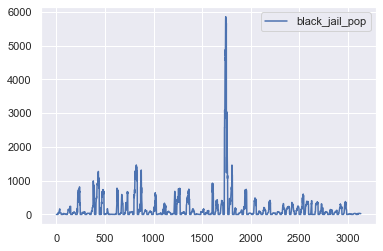

<Figure size 1224x576 with 0 Axes>

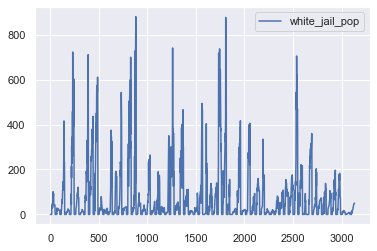

In [82]:
LA_total_black_jail_pop_df = LA_df[['black_jail_pop']].copy()

plt.figure(figsize=(17,8))
LA_total_black_jail_pop_df.plot.line()

LA_total_white_jail_pop_df = LA_df[['white_jail_pop']].copy()

plt.figure(figsize=(17,8))
LA_total_white_jail_pop_df.plot.line()

<Figure size 1224x576 with 0 Axes>

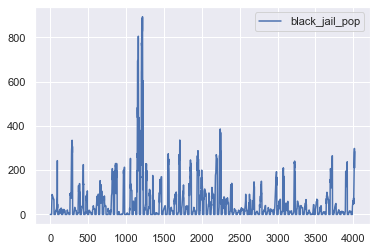

<Figure size 1224x576 with 0 Axes>

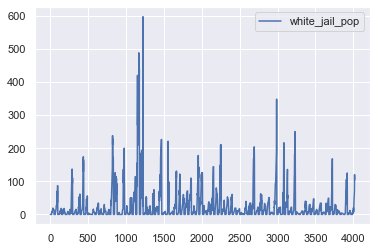

In [87]:
MS_total_black_jail_pop_df = MS_df[[ 'black_jail_pop']].copy()

plt.figure(figsize=(17,8))
MS_total_black_jail_pop_df.plot.line()

MS_total_white_jail_pop_df = MS_df[[ 'white_jail_pop']].copy()

plt.figure(figsize=(17,8))
MS_total_white_jail_pop_df.plot.line()

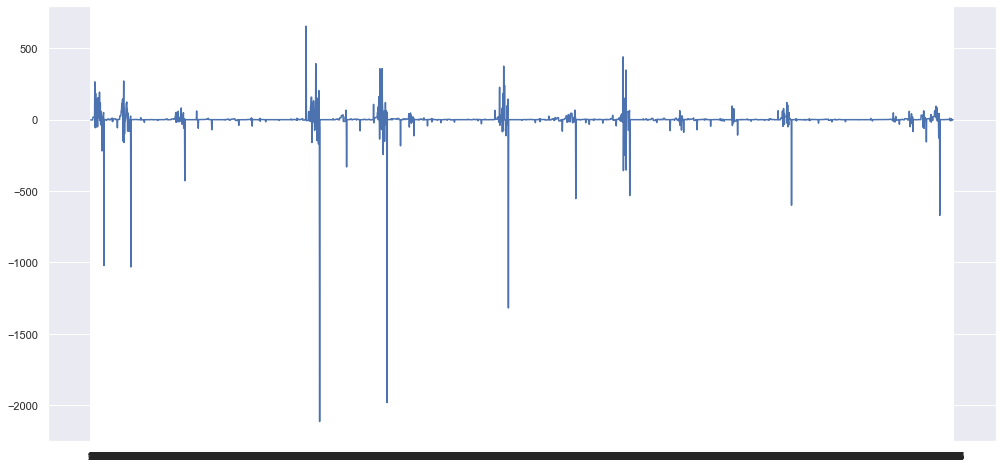

In [50]:
CO_diff_jail_pop = CO_total_jail_pop_df.diff().rename(index=str, columns={"total_jail_pop": "total jail pop"})

#plot of differenced data (more stationary)
plt.figure(figsize=(17,8))
plt.plot(CO_diff_jail_pop)

<Figure size 1224x576 with 0 Axes>

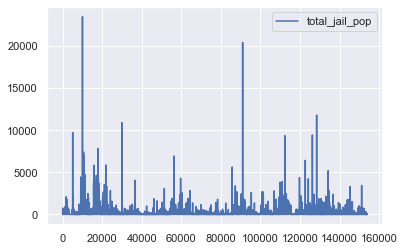

In [97]:
MA_total_jail_pop_df = MA_df[[ 'total_jail_pop']].copy()

plt.figure(figsize=(17,8))
total_jail_pop_df.plot.line()

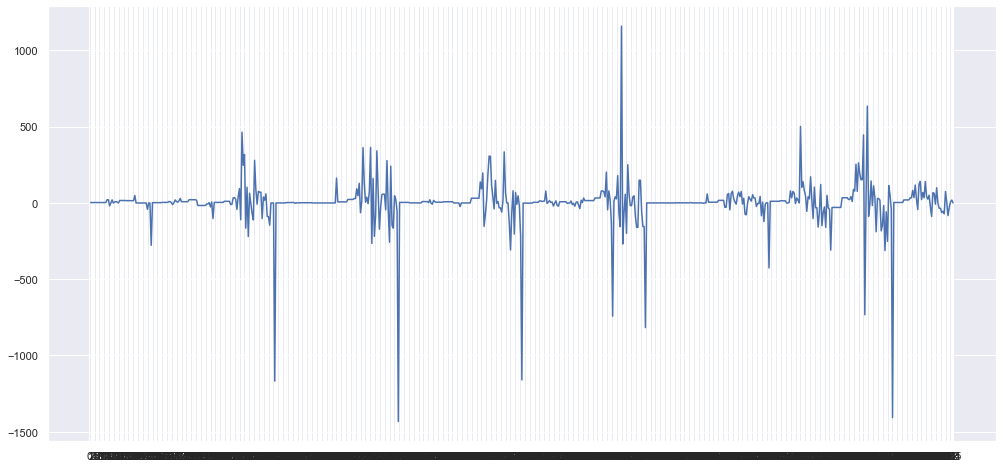

In [98]:
MA_diff_jail_pop = MA_total_jail_pop_df.diff().rename(index=str, columns={"total_jail_pop": "total jail pop"})

#plot of differenced data (more stationary)
plt.figure(figsize=(17,8))
plt.plot(MA_diff_jail_pop)

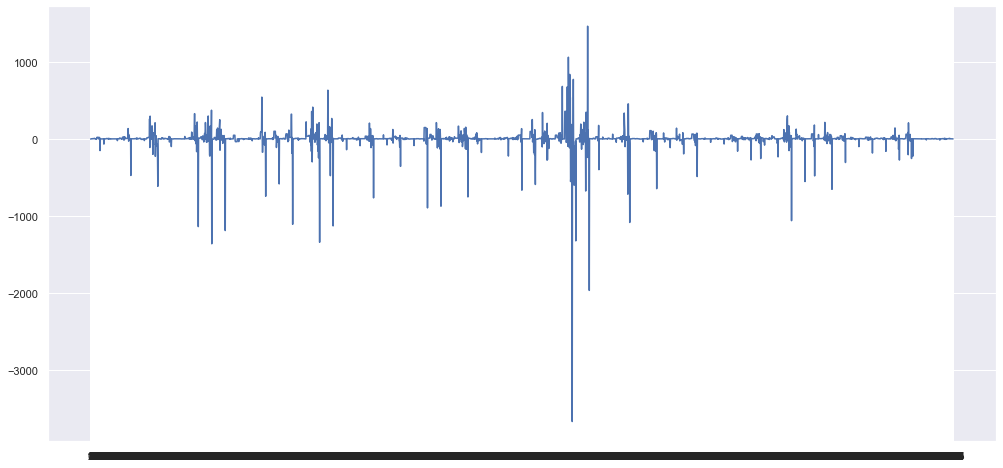

In [52]:
LA_diff_jail_pop = LA_total_jail_pop_df.diff().rename(index=str, columns={"total_jail_pop": "total jail pop"})

#plot of differenced data (more stationary)
plt.figure(figsize=(17,8))
plt.plot(LA_diff_jail_pop)

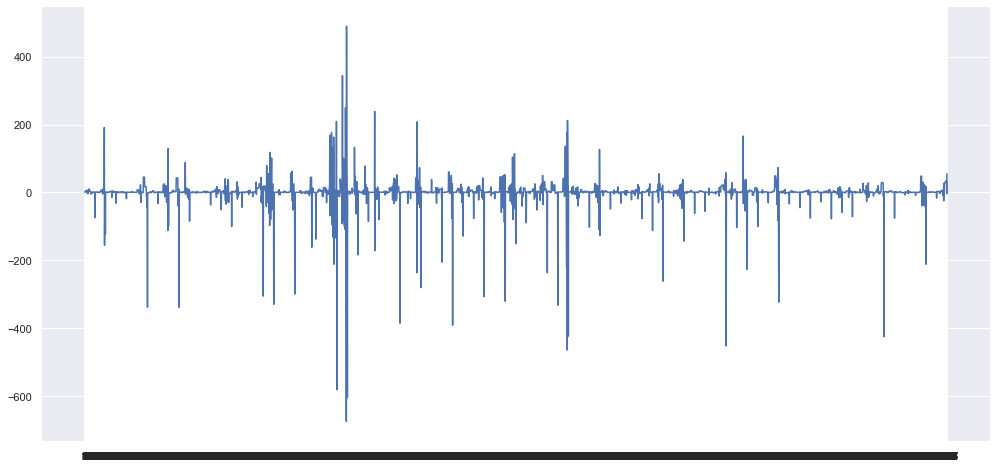

In [53]:
MS_diff_jail_pop = MS_total_jail_pop_df.diff().rename(index=str, columns={"total_jail_pop": "total jail pop"})

#plot of differenced data (more stationary)
plt.figure(figsize=(17,8))
plt.plot(MS_diff_jail_pop)

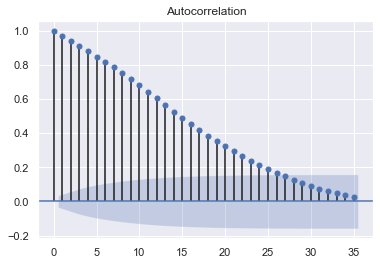

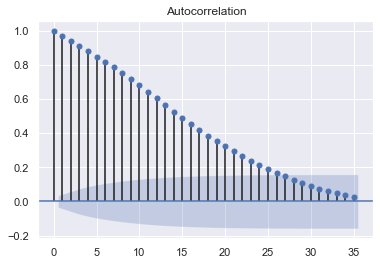

In [54]:
#CO plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(CO_total_jail_pop_df[:-1], alpha=.05)

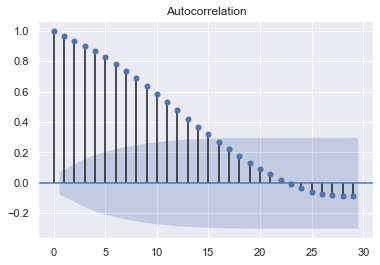

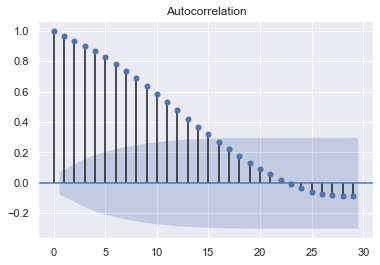

In [99]:
#MA plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(MA_total_jail_pop_df[:-1], alpha=.05)

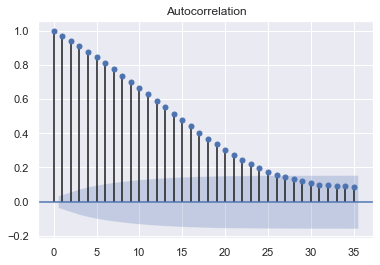

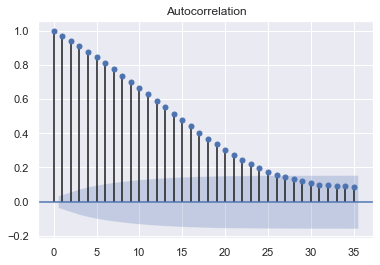

In [56]:
#LA plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(LA_total_jail_pop_df[:-1], alpha=.05)

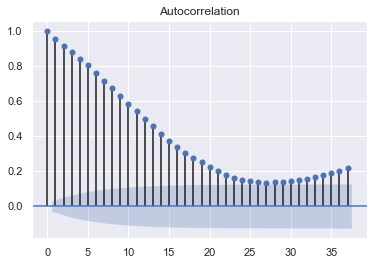

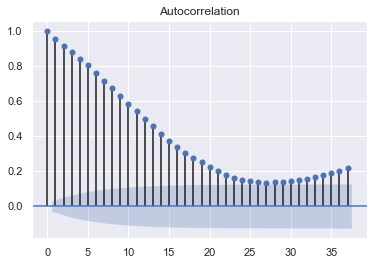

In [57]:
#MS plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(MS_total_jail_pop_df[:-1], alpha=.05)

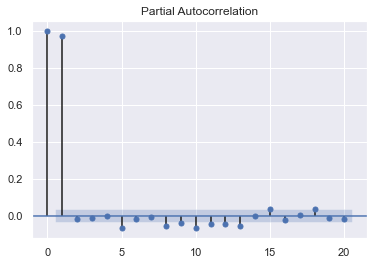

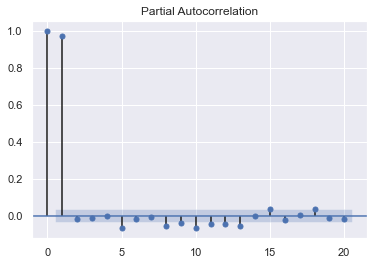

In [58]:
plot_pacf(CO_total_jail_pop_df[:-1], alpha=.05, lags=20)

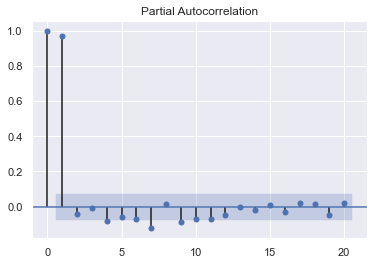

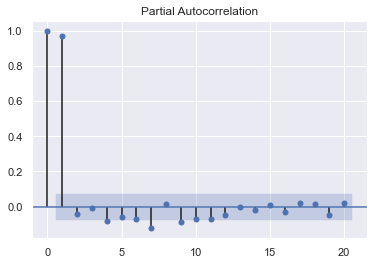

In [100]:
plot_pacf(MA_total_jail_pop_df[:-1], alpha=.05, lags=20)

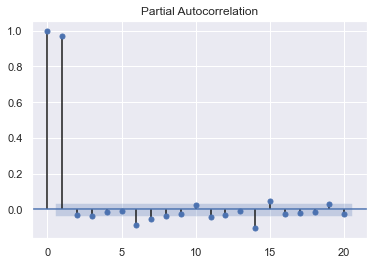

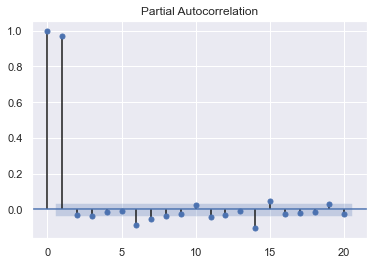

In [60]:
plot_pacf(LA_total_jail_pop_df[:-1], alpha=.05, lags=20)

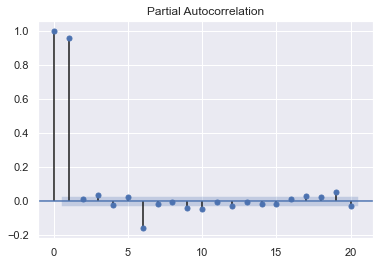

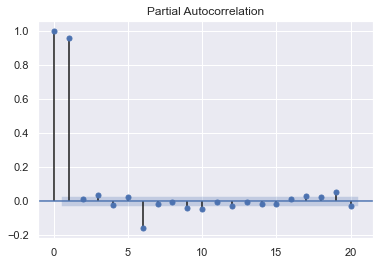

In [61]:
plot_pacf(MS_total_jail_pop_df[:-1], alpha=.05, lags=20)

In [62]:
#CO ARIMA Model

model = ARIMA(CO_total_jail_pop_df[:-1], order=(3,1,0))
CO_jail_pop_model_fit = model.fit(disp=0)
print(CO_jail_pop_model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:       D.total_jail_pop   No. Observations:                 3134
Model:                 ARIMA(3, 1, 0)   Log Likelihood              -17974.664
Method:                       css-mle   S.D. of innovations             74.921
Date:                Mon, 09 Nov 2020   AIC                          35959.327
Time:                        09:58:45   BIC                          35989.577
Sample:                             1   HQIC                         35970.184
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0144      1.313     -0.011      0.991      -2.589       2.560
ar.L1.D.total_jail_pop    -0.0012      0.018     -0.065      0.948      -0.036       0.034
ar.L

/Users/markdetiberiis/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [101]:
#MA ARIMA Model

model = ARIMA(MA_total_jail_pop_df[:-1], order=(3,1,0))
MA_jail_pop_model_fit = model.fit(disp=0)
print(MA_jail_pop_model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:       D.total_jail_pop   No. Observations:                  684
Model:                 ARIMA(3, 1, 0)   Log Likelihood               -4385.661
Method:                       css-mle   S.D. of innovations            147.354
Date:                Wed, 11 Nov 2020   AIC                           8781.321
Time:                        09:46:44   BIC                           8803.961
Sample:                             1   HQIC                          8790.082
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.5627      6.055      0.258      0.796     -10.304      13.429
ar.L1.D.total_jail_pop     0.0243      0.038      0.637      0.524      -0.050       0.099
ar.L

/Users/markdetiberiis/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [64]:
#LA ARIMA Model

model = ARIMA(LA_total_jail_pop_df[:-1], order=(3,1,0))
LA_jail_pop_model_fit = model.fit(disp=0)
print(LA_jail_pop_model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:       D.total_jail_pop   No. Observations:                 3134
Model:                 ARIMA(3, 1, 0)   Log Likelihood              -19762.752
Method:                       css-mle   S.D. of innovations            132.553
Date:                Mon, 09 Nov 2020   AIC                          39535.503
Time:                        09:58:45   BIC                          39565.754
Sample:                             1   HQIC                         39546.360
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0128      2.442      0.005      0.996      -4.774       4.799
ar.L1.D.total_jail_pop     0.0155      0.018      0.870      0.384      -0.019       0.051
ar.L

/Users/markdetiberiis/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [65]:
#MS ARIMA model

model = ARIMA(MS_total_jail_pop_df[:-1], order=(3,1,0))
MS_jail_pop_model_fit = model.fit(disp=0)
print(MS_jail_pop_model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:       D.total_jail_pop   No. Observations:                 4016
Model:                 ARIMA(3, 1, 0)   Log Likelihood              -20340.606
Method:                       css-mle   S.D. of innovations             38.319
Date:                Mon, 09 Nov 2020   AIC                          40691.212
Time:                        09:58:45   BIC                          40722.702
Sample:                             1   HQIC                         40702.372
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0939      0.557      0.169      0.866      -0.998       1.186
ar.L1.D.total_jail_pop    -0.0375      0.016     -2.376      0.017      -0.068      -0.007
ar.L

/Users/markdetiberiis/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<Figure size 1224x576 with 0 Axes>

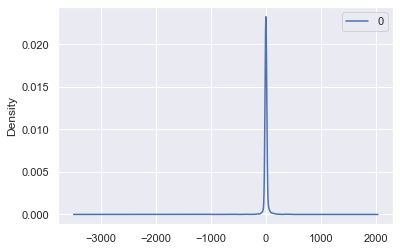

In [66]:
plt.figure(figsize=(17,8))
residuals = pd.DataFrame(CO_jail_pop_model_fit.resid)
residuals.plot(kind='kde')
plt.show()

<Figure size 1224x576 with 0 Axes>

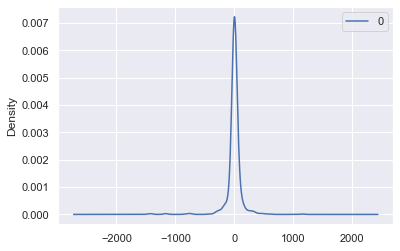

In [102]:
plt.figure(figsize=(17,8))
residuals = pd.DataFrame(MA_jail_pop_model_fit.resid)
residuals.plot(kind='kde')
plt.show()

<Figure size 1224x576 with 0 Axes>

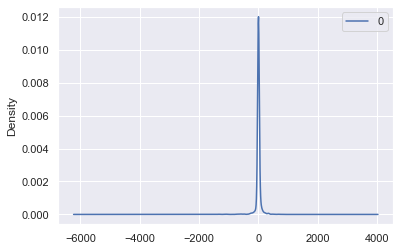

In [68]:
plt.figure(figsize=(17,8))
residuals = pd.DataFrame(LA_jail_pop_model_fit.resid)
residuals.plot(kind='kde')
plt.show()

<Figure size 1224x576 with 0 Axes>

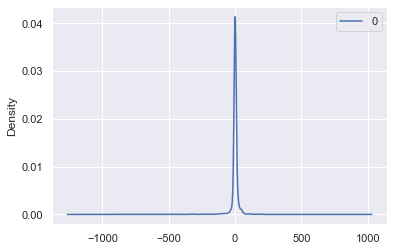

In [69]:
plt.figure(figsize=(17,8))
residuals = pd.DataFrame(MS_jail_pop_model_fit.resid)
residuals.plot(kind='kde')
plt.show()

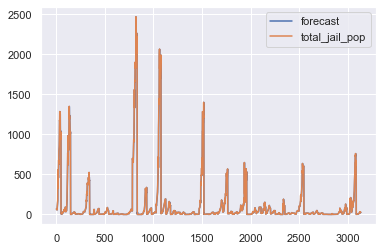

<Figure size 1224x576 with 0 Axes>

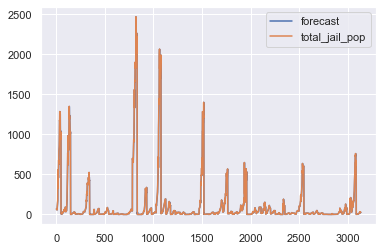

In [70]:
plt.figure(figsize=(17,8))
CO_jail_pop_model_fit.plot_predict()

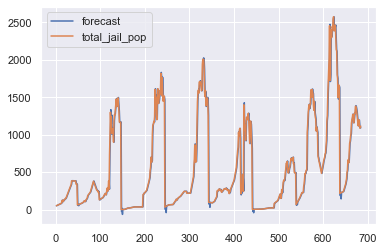

<Figure size 1224x576 with 0 Axes>

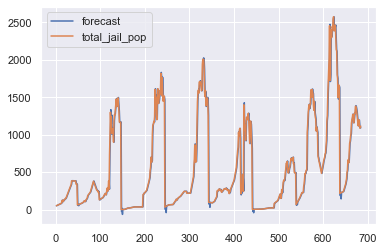

In [103]:
plt.figure(figsize=(17,8))
MA_jail_pop_model_fit.plot_predict()

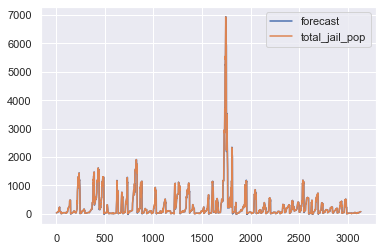

<Figure size 1224x576 with 0 Axes>

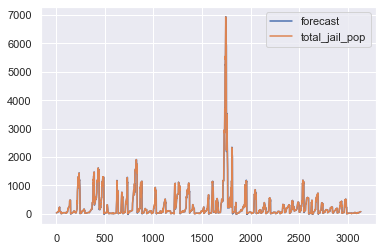

In [72]:
plt.figure(figsize=(17,8))
LA_jail_pop_model_fit.plot_predict()

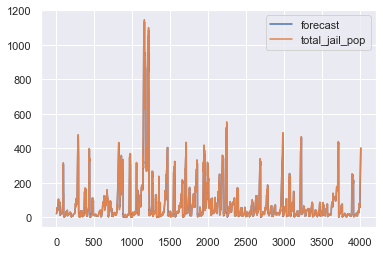

<Figure size 1224x576 with 0 Axes>

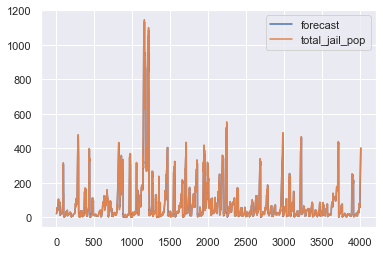

In [112]:
plt.figure(figsize=(17,8))
MS_jail_pop_model_fit.plot_predict()

<Figure size 1224x576 with 0 Axes>

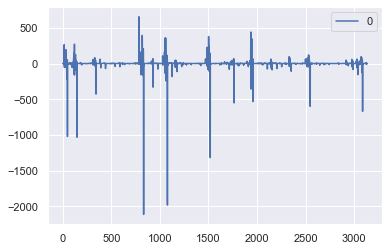

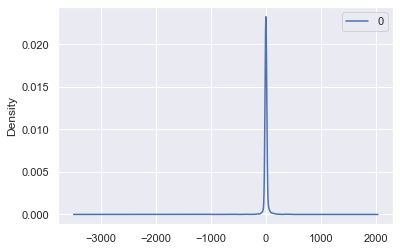

                 0
count  3134.000000
mean     -0.000004
std      74.933075
min   -2112.434265
25%      -0.067945
50%       0.105542
75%       1.691034
max     655.014627


In [74]:
# plot open residual errors

plt.figure(figsize=(17,8))
residuals = pd.DataFrame(CO_jail_pop_model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

<Figure size 1224x576 with 0 Axes>

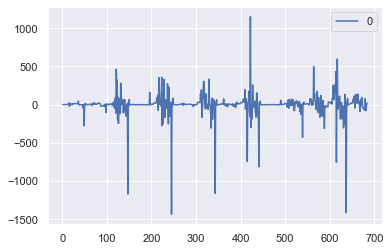

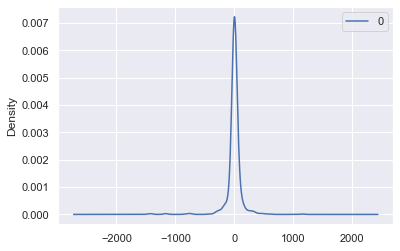

                 0
count   684.000000
mean     -0.000286
std     147.461872
min   -1435.595606
25%      -2.326674
50%       1.918638
75%      21.066378
max    1150.145084


In [104]:
# plot open residual errors

plt.figure(figsize=(17,8))
residuals = pd.DataFrame(MA_jail_pop_model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

<Figure size 1224x576 with 0 Axes>

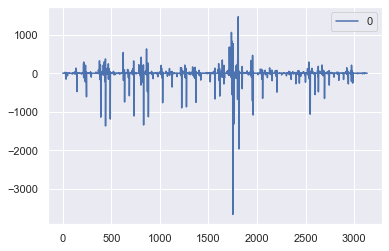

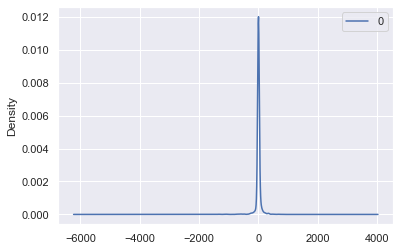

                  0
count  3.134000e+03
mean  -3.357758e-09
std    1.325739e+02
min   -3.665251e+03
25%   -4.834579e-01
50%    1.441960e+00
75%    8.945849e+00
max    1.467098e+03


In [76]:
# plot open residual errors

plt.figure(figsize=(17,8))
residuals = pd.DataFrame(LA_jail_pop_model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

<Figure size 1224x576 with 0 Axes>

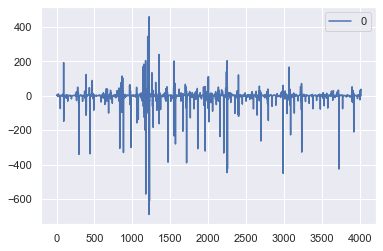

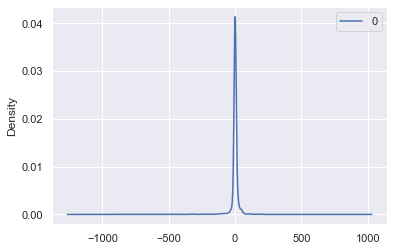

                 0
count  4016.000000
mean     -0.000004
std      38.324021
min    -689.299673
25%      -0.549298
50%       0.553208
75%       3.528539
max     457.888133


In [77]:
# plot open residual errors

plt.figure(figsize=(17,8))
residuals = pd.DataFrame(MS_jail_pop_model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [78]:
CO_jail_pop_model_fit.forecast()

(array([24.98537344]),
 array([74.92111944]),
 array([[-121.85732234,  171.82806923]]))

In [110]:
MA_jail_pop_model_fit.forecast()

(array([78.01237468]),
 array([132.55276039]),
 array([[-181.78626174,  337.81101111]]))

In [111]:
LA_jail_pop_model_fit.forecast()

(array([1114.20115131]),
 array([147.35403868]),
 array([[ 825.39254252, 1403.00976011]]))

In [81]:
MS_jail_pop_model_fit.forecast()

(array([396.68851696]),
 array([38.31924904]),
 array([[321.58416892, 471.79286499]]))

In [109]:
jail_pop_model_fit.forecast()

(array([5.00003161]),
 array([119.17808405]),
 array([[-228.58472088,  238.5847841 ]]))

In [107]:
CO_jail_pop_model_fit.predict().to_csv('/Users/markdetiberiis/Desktop/Incarceration_Data/CO_preds.csv')
MA_jail_pop_model_fit.predict().to_csv('/Users/markdetiberiis/Desktop/Incarceration_Data/MA_preds.csv')
LA_jail_pop_model_fit.predict().to_csv('/Users/markdetiberiis/Desktop/Incarceration_Data/LA_preds.csv')
MS_jail_pop_model_fit.predict().to_csv('/Users/markdetiberiis/Desktop/Incarceration_Data/MS_preds.csv')

In [108]:
jail_pop_model_fit.predict().to_csv('/Users/markdetiberiis/Desktop/Incarceration_Data/ALL_preds.csv')

In [113]:
pwd

'/Users/markdetiberiis/Prison_Series'